In [1]:
from utils.loadData import load_data, TRAIN_DATA_POINTS, TEST_DATA_POINTS, N_CLASSES
from utils.processing import generate_class_matrix, generate_test_class_matrix

train_data = load_data("data/ae.train", num_data_points=TRAIN_DATA_POINTS)
test_data = load_data("data/ae.test", num_data_points=TEST_DATA_POINTS)

train_class_matrix = generate_class_matrix(TRAIN_DATA_POINTS, N_CLASSES)
test_class_matrix = generate_test_class_matrix(TEST_DATA_POINTS, N_CLASSES)

Successfully created a NumPy array with shape: (270, 29, 12)
Successfully created a NumPy array with shape: (370, 29, 12)


The following code displays a random data point.

Showing data point 22.


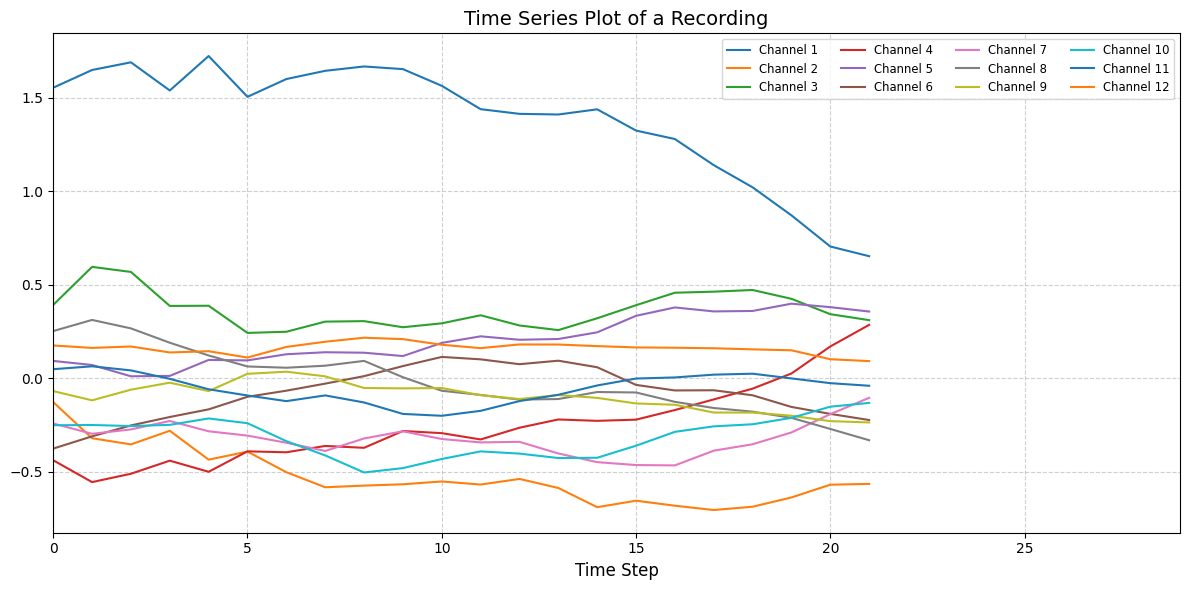

In [2]:
from utils.visualizeData import visualize_data_point
import numpy as np

data_idx = np.random.randint(0, TRAIN_DATA_POINTS)

print(f"Showing data point {data_idx}.")
visualize_data_point(train_data[data_idx])

Visualizing the pattern mean of the training data. The tail of the signal is less smooth, because the number of data points that reach that lenght taper off.

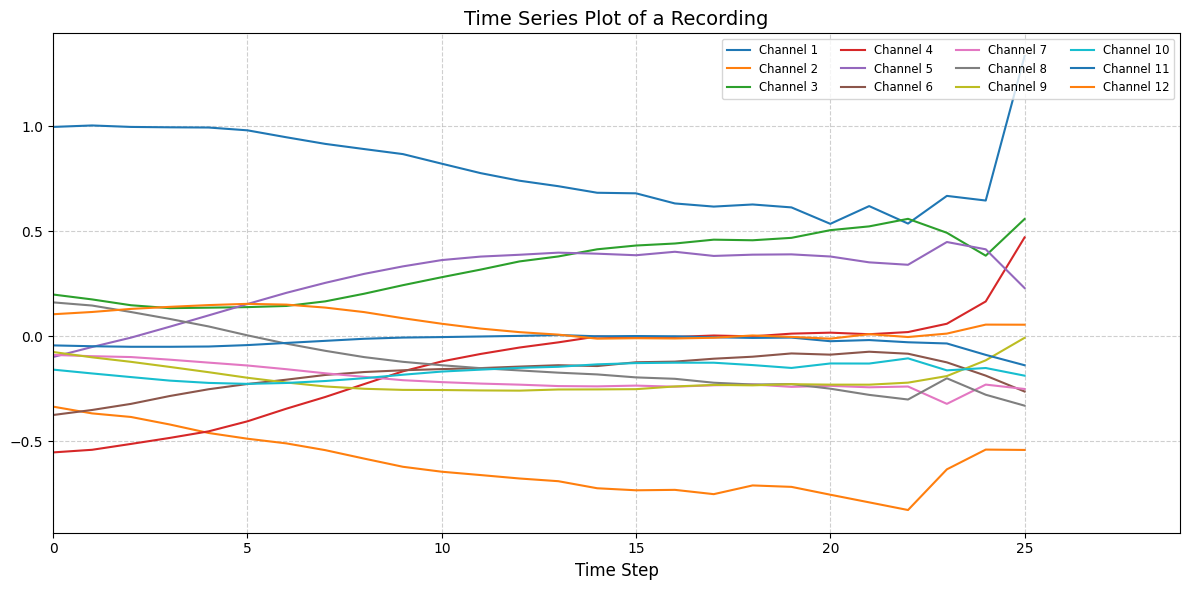

In [3]:
from utils.processing import get_pattern_mean

train_pattern_mean = get_pattern_mean(train_data)
visualize_data_point(train_pattern_mean)

The distribution of signal lengths in the training data

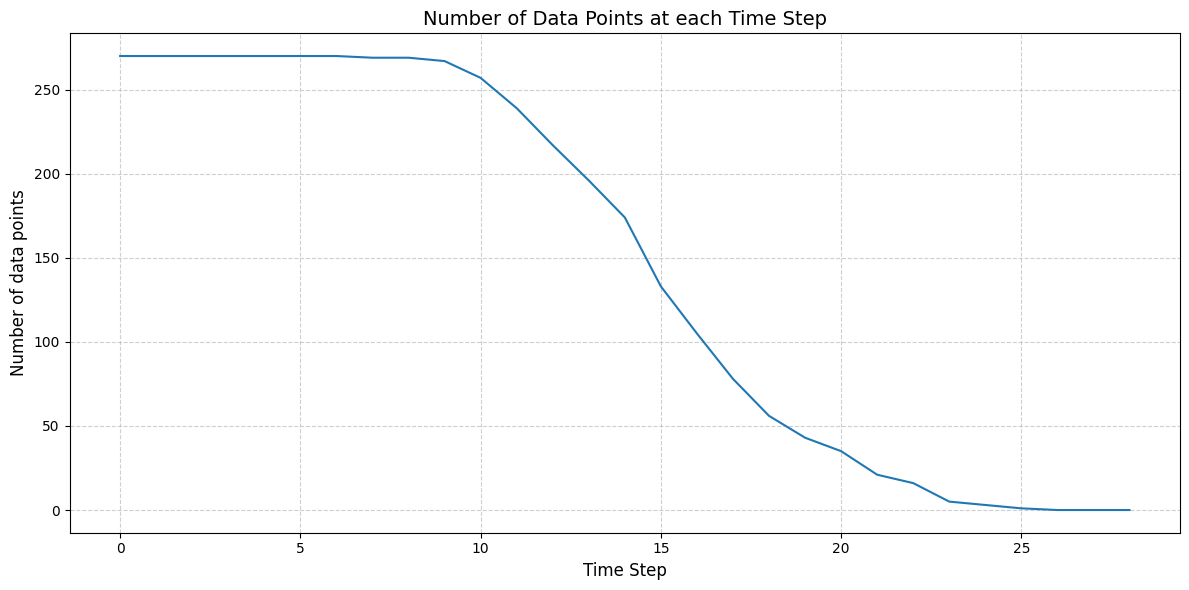

In [4]:
from utils.processing import get_time_steps
from utils.visualizeData import visualize_data_lengths

time_steps = get_time_steps(train_data)
visualize_data_lengths(time_steps)

Visualizing the pattern means for all classes, to get an insight and feel for the different classes.

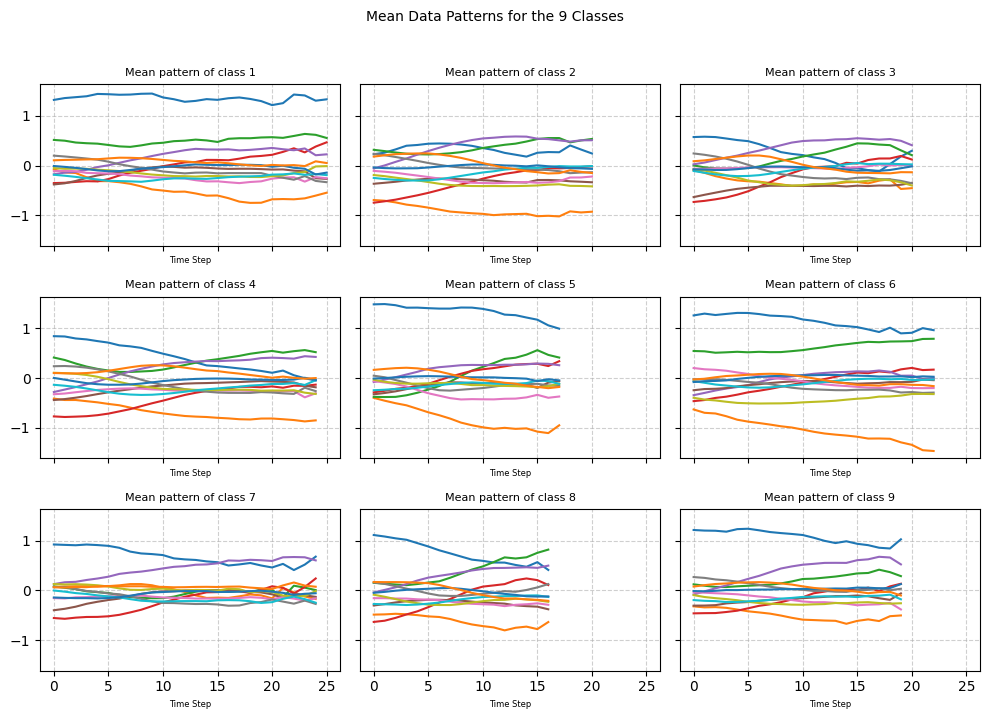

In [5]:
from utils.visualizeData import visualize_class_means

visualize_class_means(train_data)

The first step of Principal Component Analysis (PCA) is to obtain the Principal Components (PCs) and the respective feature variances.

In [ ]:
from linear_regression.pca import normalize, SVD

train_data = normalize(train_data, train_pattern_mean)
principal_components, feature_variances = SVD(train_data)

(348, 348)

Here we can see the variance distribution of the PCs. Notice that there are more features than data points. Therefore, the variance after the number of training data points (270) drops to 0.

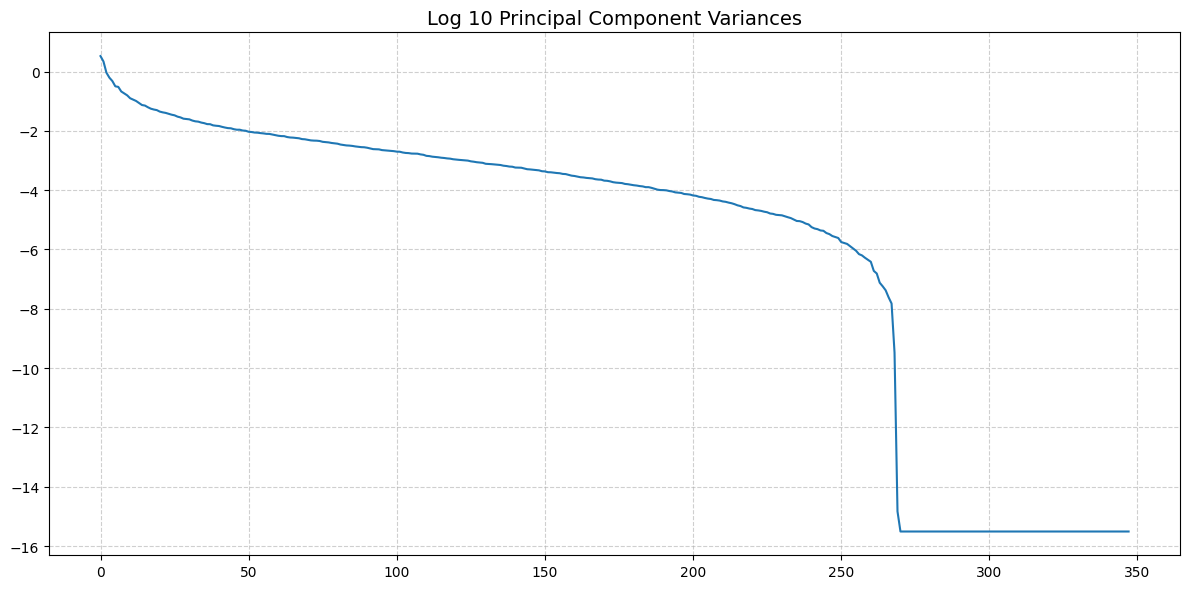

In [10]:
from utils.visualizeData import visualize_PC_variance

visualize_PC_variance(feature_variances, log=True)

Here we obtain the regression classifier.

In [14]:
from linear_regression.pca import reduce_PCs, get_feature_vectors
from linear_regression.classifier import compute_regression_classifier

reduced_PCs = reduce_PCs(feature_variances, principal_components, wanted_variance=99)
feature_vectors = get_feature_vectors(train_data, reduced_PCs)
regression_classifier = compute_regression_classifier(feature_vectors, train_class_matrix)

In [15]:
from linear_regression.classifier import compute_MSE, compute_mismatch

train_mse = compute_MSE(regression_classifier, feature_vectors, train_class_matrix)
train_mismatch = compute_mismatch(regression_classifier, feature_vectors, train_class_matrix)

print("MSE:\t\t{:.2f}".format(train_mse))
print("Mismatch:\t{:.2f}%".format(train_mismatch * 100))

MSE:		0.29
Mismatch:	1.11%


Here we first obtain the test feature vectors, and then compute the accuracy of our regression classifier.

In [16]:
test_data = normalize(test_data, train_pattern_mean)
test_feature_vectors = get_feature_vectors(test_data, reduced_PCs)

test_mse = compute_MSE(regression_classifier, test_feature_vectors, test_class_matrix)
test_mismatch = compute_mismatch(regression_classifier, test_feature_vectors, test_class_matrix)

print("MSE:\t\t{:.2f}".format(test_mse))
print("Mismatch:\t{:.2f}%".format(test_mismatch * 100))

MSE:		0.47
Mismatch:	5.41%
